<a href="https://colab.research.google.com/github/jarrydbrennan/Biodiversity_in_National_Parks/blob/main/biodiversity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

1. What is the distribution of conservation status for species?

2. Are certain types of species more likely to be endangered?
3. Are the differences between species and their conservation status significant?
4. Which animal is most prevalent and what is their distribution amongst parks?

**Data sources:**

Both Observations.csv and Species_info.csv was provided by Codecademy.com.

Note: The data for this project is inspired by real data, but is mostly fictional.

# Scoping
It's beneficial to create a project scope whenever a new project is being started. Four sections were created below to help guide the project's process and progress. The first section is the project goals, this section will define the high-level objectives and set the intentions for this project. The next section is the data, luckily in this project, data is already provided but still needs to be checked if project goals can be met with the available data. Thirdly, the analysis will have to be thought through, which include the methods and questions that are aligned with the project goals. Lastly, evaluation will help us build conclusions and findings from our analysis.

# Project Goals
In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks. Some questions that are posed:

What is the distribution of conservation status for species?
Are certain types of species more likely to be endangered?
Are the differences between species and their conservation status significant?
Which animal is most prevalent and what is their distribution amongst parks?
Data
This project has two data sets that came with the package. The first csv file has information about each species and another has observations of species with park locations. This data will be used to analyze the goals of the project.

# Analysis
In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include:

Distributions
counts
relationship between species
conservation status of species
observations of species in parks.
# Evaluation
Lastly, it's a good idea to revisit the goals and check if the output of the analysis corresponds to the questions first set to be answered (in the goals section). This section will also reflect on what has been learned through the process, and if any of the questions were unable to be answered. This could also include limitations or if any of the analysis could have been done using different methodologies.

Import Python Modules and Mount Drive

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load file into dataframe & inspect

In [2]:
file_path = '/content/drive/MyDrive/Codecademy/biodiversity_starter'
observations = pd.read_csv(os.path.join(file_path, 'observations.csv'))
species_info = pd.read_csv(os.path.join(file_path, 'species_info.csv'))
print(observations.head(10))
#print(species_info.head(10))

                     scientific_name                            park_name  \
0                 Vicia benghalensis  Great Smoky Mountains National Park   
1                     Neovison vison  Great Smoky Mountains National Park   
2                  Prunus subcordata               Yosemite National Park   
3               Abutilon theophrasti                  Bryce National Park   
4           Githopsis specularioides  Great Smoky Mountains National Park   
5  Elymus virginicus var. virginicus               Yosemite National Park   
6                   Spizella pusilla            Yellowstone National Park   
7                  Elymus multisetus  Great Smoky Mountains National Park   
8             Lysimachia quadrifolia               Yosemite National Park   
9         Diphyscium cumberlandianum            Yellowstone National Park   

   observations  
0            68  
1            77  
2           138  
3            84  
4            85  
5           112  
6           228  
7       

In [3]:
print(observations.columns)
print(species_info.columns)

Index(['scientific_name', 'park_name', 'observations'], dtype='object')
Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')


In [ ]:
print("Obs Data Types: \n", observations.dtypes)
print("Species Data Types: \n", species_info.dtypes)

How many different species are in the species DataFrame?

In [5]:
print(observations.shape,"\n", observations.nunique())
print(species_info.shape,"\n", species_info.nunique())

(23296, 3) 
 scientific_name    5541
park_name             4
observations        304
dtype: int64
(5824, 4) 
 category                  7
scientific_name        5541
common_names           5504
conservation_status       4
dtype: int64


Duplicates?

In [ ]:
print(species_info['common_names'].duplicated().sum())
print(species_info[species_info['common_names'].duplicated()]['common_names'].value_counts())

In [ ]:
print(species_info['scientific_name'].duplicated().sum())
print(species_info[species_info['scientific_name'].duplicated()]['scientific_name'].value_counts())

In [8]:
print(species_info[species_info['scientific_name'].duplicated()]['category'].value_counts())

Vascular Plant    208
Mammal             38
Bird               33
Fish                2
Amphibian           1
Reptile             1
Name: category, dtype: int64


What's missing?

In [9]:
print("Observations missing Data: ", observations.isna().sum())
print("Species Info missing Data: ", species_info.isna().sum())

Observations missing Data:  scientific_name    0
park_name          0
observations       0
dtype: int64
Species Info missing Data:  category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64


Conservation status.

In [ ]:
species_info['conservation_status'].head(50)

In [11]:
no_conserv_status = species_info[species_info['conservation_status'].isna()]['scientific_name']
print("Total number of species: ", len(species_info))
print("Number of species without a conservation status :", len(no_conserv_status))
print("Proportion of species in dataset without conservation status: ", round(len(no_conserv_status)/len(species_info),3))
print("Number of species on 'Watchlist': ", len(species_info)-len(no_conserv_status))

Total number of species:  5824
Number of species without a conservation status : 5633
Proportion of species in dataset without conservation status:  0.967
Number of species on 'Watchlist':  191


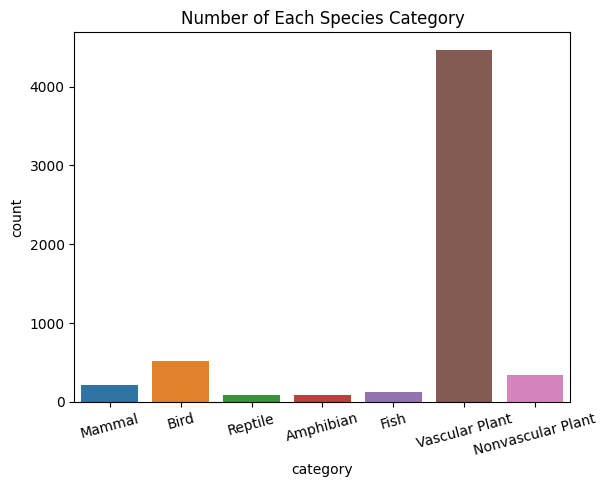

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64


<Figure size 640x480 with 0 Axes>

In [12]:
sns.countplot(x = 'category', data = species_info)
plt.xticks(rotation = 15)
plt.title('Number of Each Species Category')
plt.show()
plt.clf()
print(species_info.category.value_counts())

What are the different values of conservation_status?

In [27]:
species_info.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

The column conservation_status has several possible values:

> **Species of Concern**: declining or appear to be in need of conservation

> **Threatened**: vulnerable to endangerment in the near future

> **Endangered**: seriously at risk of extinction

> **In Recovery**: formerly Endangered, but currnetly neither in danger of extinction throughout all or a significant portion of its range

> **nan**: aka "No Status"


What is the distribution of conservation_status for animals?

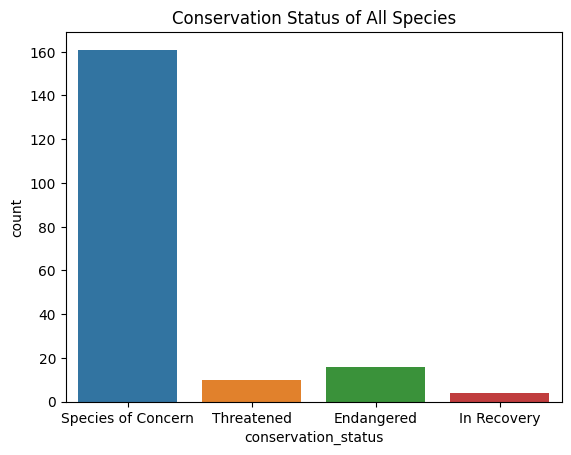

Not shown are the species that have no status 

  conservation_status  scientific_name
0          Endangered               15
1         In Recovery                4
2           No Status             5363
3  Species of Concern              151
4          Threatened               10


<Figure size 640x480 with 0 Axes>

In [33]:
sns.countplot(x = 'conservation_status', data = species_info, order = ['Species of Concern', 'Threatened', 'Endangered','In Recovery'])
plt.title('Conservation Status of All Species')
plt.show()
plt.clf()
print("Not shown are the species that have no status \n")

status_groups = species_info.groupby('conservation_status').scientific_name.nunique().reset_index()
print(status_groups)

In [32]:
species_info.fillna('No Status', inplace=True)
status_groups = species_info.groupby('conservation_status').scientific_name.nunique().reset_index()
print(status_groups)

  conservation_status  scientific_name
0          Endangered               15
1         In Recovery                4
2           No Status             5363
3  Species of Concern              151
4          Threatened               10


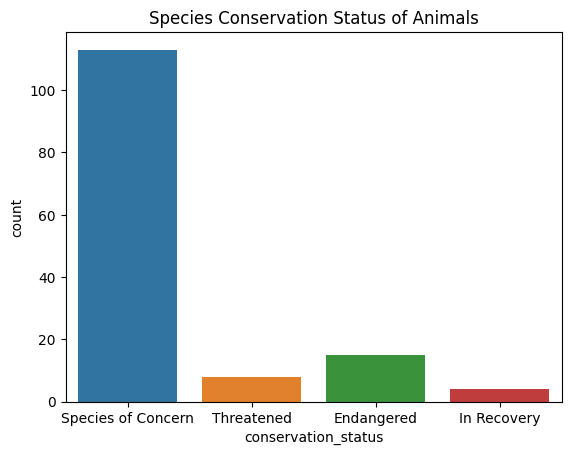

<Figure size 640x480 with 0 Axes>

In [34]:
animals = ['Bird','Mammal','Reptile', 'Fish', 'Amphibian']
sns.countplot(x = species_info[species_info['category'].isin(animals)]['conservation_status'], data = species_info, order = ['Species of Concern', 'Threatened', 'Endangered','In Recovery'])
plt.title('Species Conservation Status of Animals')
plt.show()
plt.clf()

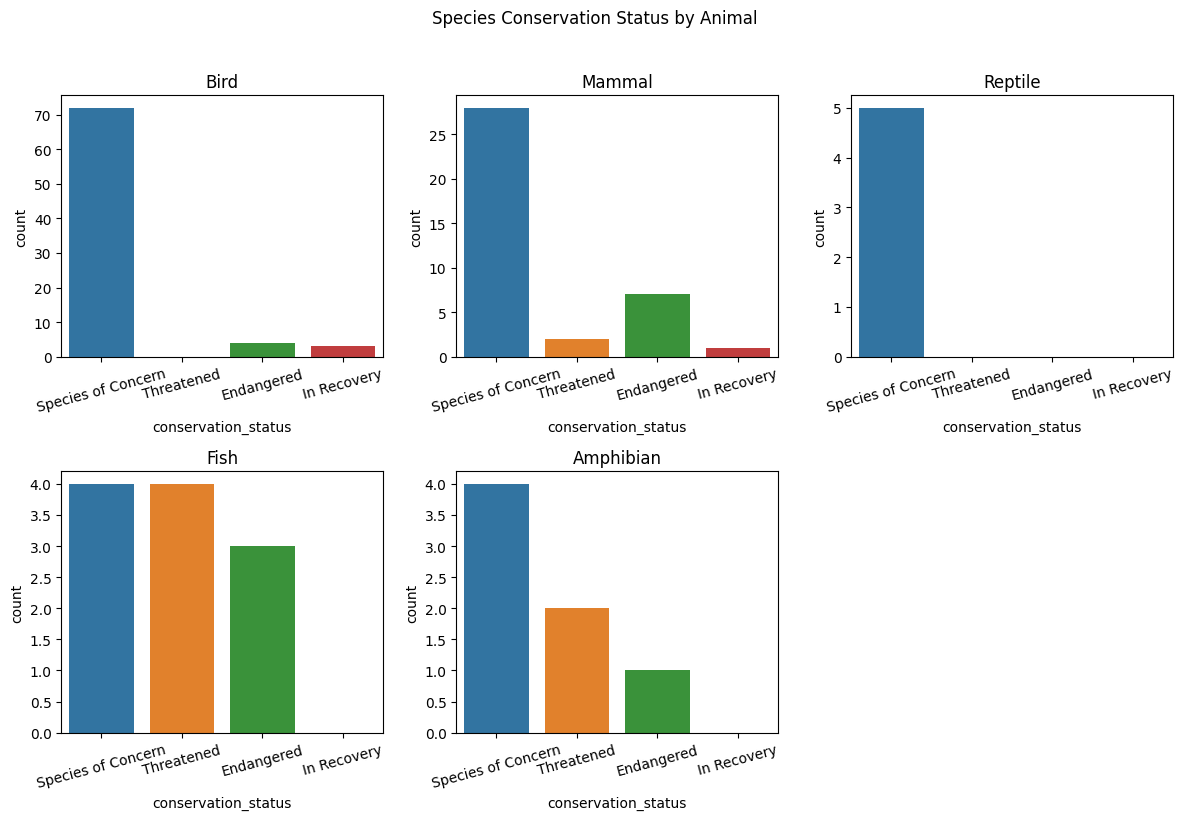

In [35]:
fig, axes = plt.subplots(2,3, figsize = (12,8))
fig.suptitle('Species Conservation Status by Animal', y = 1.02)
for i, animal in enumerate(animals):
  row = i // 3
  col = i % 3
  sns.countplot(x = species_info[species_info['category'] == animal]['conservation_status'], data = species_info, order = ['Species of Concern', 'Threatened', 'Endangered','In Recovery'], ax = axes[row,col])
  axes[row,col].set_title(animal)
  axes[row,col].tick_params(axis='x', rotation = 15)
for i in range(len(animals), 2*3):
  fig.delaxes(axes.flatten()[i])
plt.tight_layout()
plt.show()

Are certain types of species more likely to be endangered?

<ipython-input-16-3006271e1de1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_species_info['conservation_status'] = filtered_species_info['conservation_status'].fillna('No Status')


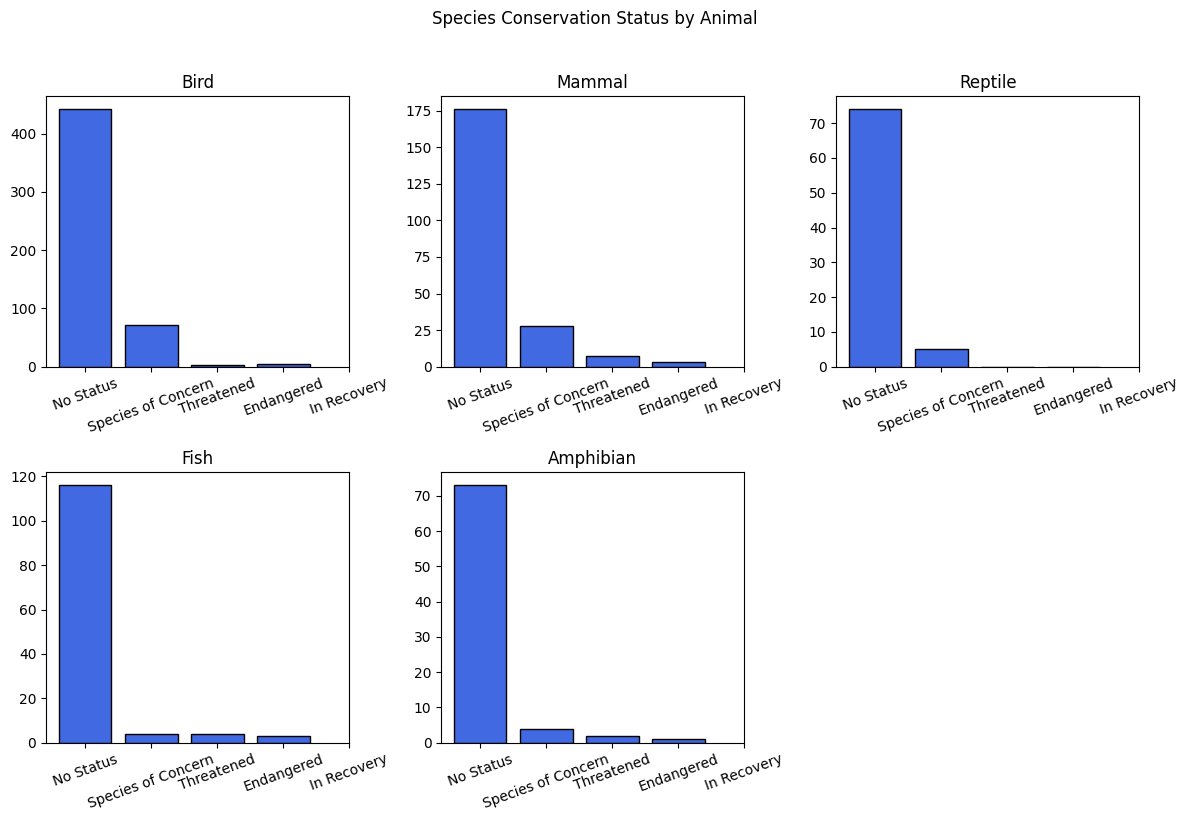

In [16]:
fig, axes = plt.subplots(2,3, figsize = (12,8))
fig.suptitle('Species Conservation Status by Animal', y = 1.02)
for i, animal in enumerate(animals):
  row = i // 3
  col = i % 3
  filtered_species_info = species_info[species_info['category'] == animal]
  filtered_species_info['conservation_status'] = filtered_species_info['conservation_status'].fillna('No Status')
  bins = [0,1,2,3,4]
  axes[row,col].hist(filtered_species_info['conservation_status'], bins=bins, align='left', rwidth=0.8, color='royalblue', edgecolor='black')
  axes[row,col].set_title(animal)
  axes[row,col].set_xticks(range(5))
  axes[row,col].set_xticklabels(['No Status','Species of Concern', 'Threatened', 'Endangered','In Recovery'])
  axes[row,col].tick_params(axis='x', rotation = 20)
for i in range(len(animals), 2*3):
  fig.delaxes(axes.flatten()[i])
plt.tight_layout()
plt.show()

Are the differences between species and their conservation status significant?

In [17]:
def con_status (df,animals,status):
  for animal in animals:
    animal_count = df[df['category']==animal]['scientific_name'].count()
    animal_cat = df[df['category']==animal]
    animal_end = animal_cat[animal_cat['conservation_status'] == status[3]]['scientific_name'].count()
    animal_threat = animal_cat[animal_cat['conservation_status'] == status[2]]['scientific_name'].count()
    animal_concern = animal_cat[animal_cat['conservation_status'] == status[1]]['scientific_name'].count()
    animal_recovery = animal_cat[animal_cat['conservation_status'] == status[4]]['scientific_name'].count()
    animal_watchlist = animal_end+animal_threat+animal_concern+animal_recovery
    animal_status = animal_watchlist/animal_count
    print(f"{round(animal_status*100,2)}% of {animal}s are on the conservation watch list, of which, {round((animal_end/animal_count)*100,2)}% are Endagered, {round((animal_threat/animal_count)*100,2)}% are Threatened, {round((animal_recovery/animal_count)*100,2)}% are in Recovery, with the remaining being Species of Concern \n")

In [25]:
status = species_info['conservation_status'].unique()
con_status(species_info,animals,status)

15.16% of Birds are on the conservation watch list, of which, 0.0% are Endagered, 0.77% are Threatened, 0.58% are in Recovery, with the remaining being Species of Concern 

17.76% of Mammals are on the conservation watch list, of which, 0.93% are Endagered, 3.27% are Threatened, 0.47% are in Recovery, with the remaining being Species of Concern 

6.33% of Reptiles are on the conservation watch list, of which, 0.0% are Endagered, 0.0% are Threatened, 0.0% are in Recovery, with the remaining being Species of Concern 

8.66% of Fishs are on the conservation watch list, of which, 3.15% are Endagered, 2.36% are Threatened, 0.0% are in Recovery, with the remaining being Species of Concern 

8.75% of Amphibians are on the conservation watch list, of which, 2.5% are Endagered, 1.25% are Threatened, 0.0% are in Recovery, with the remaining being Species of Concern 



In [47]:
species_info['is_protected'] = species_info.conservation_status != 'No Status'

In [48]:
category_counts = species_info.groupby(['category','is_protected']).scientific_name.nunique().reset_index()
category_counts.head()

,category,is_protected,scientific_name
0,Amphibian,False,72
1,Amphibian,True,7
2,Bird,False,413
3,Bird,True,75
4,Fish,False,115


In [49]:
category_pivot = category_counts.pivot(columns='is_protected', index='category', values='scientific_name').reset_index()
category_pivot

is_protected,category,False,True
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [50]:
category_pivot.columns = ['category', 'not_protected', 'protected']
category_pivot

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [53]:
category_pivot['percent_protected'] = (category_pivot.protected / (category_pivot.protected + category_pivot.not_protected)) *100
category_pivot

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


It looks like species in category Mammal are more likely to be endangered than species in Bird. We're going to do a significance test to see if this statement is true.

- Is the data numerical or categorical?
- How many pieces of data are you comparing?

Based on those answers, you should choose to do a chi squared test. In order to run a chi squared test, we'll need to create a contingency table.


		protected	not protected
    Mammal	?	  ?

    Bird	  ?	  ?


In [54]:
contingency = [[30,146],
               [75,413]]

In [55]:
from scipy.stats import chi2_contingency
chi2_contingency(contingency)

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

The difference is insignificant

Testing if the difference between Reptiles and Mammals is significant.

In [56]:
contingency = [[30,146],
               [5,73]]
chi2_contingency(contingency)

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

The difference here is significant

# Recorded species sightings at sevearl national parks over the past 7 days.

In [19]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [68]:
parks = observations['park_name'].unique()
print(parks,"\n",len(parks))

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park'] 
 4


Counting Sheep (but don't sleep)

In [69]:
str1 = 'This string contains Sheep'
'Sheep' in str1

True

In [70]:
str2 = 'This string contains Donkey'
'Sheep' in str2

False

Create a column is_sheep, determining T/F if the common_name contains 'Sheep'

In [71]:
species_info['is_sheep'] = species_info.common_names.apply(lambda x: 'Sheep' in x)
species_info.head()

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Status,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Status,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Status,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Status,False,True
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Status,False,False


In [72]:
species_info[species_info.is_sheep]

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Status,False,True
1139,Vascular Plant,Rumex acetosella,"Sheep Sorrel, Sheep Sorrell",No Status,False,True
2233,Vascular Plant,Festuca filiformis,Fineleaf Sheep Fescue,No Status,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
3758,Vascular Plant,Rumex acetosella,"Common Sheep Sorrel, Field Sorrel, Red Sorrel,...",No Status,False,True
3761,Vascular Plant,Rumex paucifolius,"Alpine Sheep Sorrel, Fewleaved Dock, Meadow Dock",No Status,False,True
4091,Vascular Plant,Carex illota,"Sheep Sedge, Smallhead Sedge",No Status,False,True
4383,Vascular Plant,Potentilla ovina var. ovina,Sheep Cinquefoil,No Status,False,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True


In [73]:
sheep_species = species_info[(species_info.is_sheep) & (species_info.category == 'Mammal')]
sheep_species

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Status,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True


merge with observations to get df with sheep observations.

In [76]:
sheep_observations = observations.merge(sheep_species)
sheep_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_sheep
0,Ovis canadensis,Yellowstone National Park,219,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
1,Ovis canadensis,Bryce National Park,109,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
2,Ovis canadensis,Yosemite National Park,117,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
3,Ovis canadensis,Great Smoky Mountains National Park,48,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
4,Ovis canadensis sierrae,Yellowstone National Park,67,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
5,Ovis canadensis sierrae,Yosemite National Park,39,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
6,Ovis canadensis sierrae,Bryce National Park,22,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
7,Ovis canadensis sierrae,Great Smoky Mountains National Park,25,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
8,Ovis aries,Yosemite National Park,126,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Status,False,True
9,Ovis aries,Great Smoky Mountains National Park,76,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Status,False,True


How many total sheep observations (across all three species) were made at each national park?

In [77]:
obs_by_park = sheep_observations.groupby('park_name').observations.sum().reset_index()
obs_by_park

,park_name,observations
0,Bryce National Park,250
1,Great Smoky Mountains National Park,149
2,Yellowstone National Park,507
3,Yosemite National Park,282


Create a bar chart showing the different number of observations per week at each park.

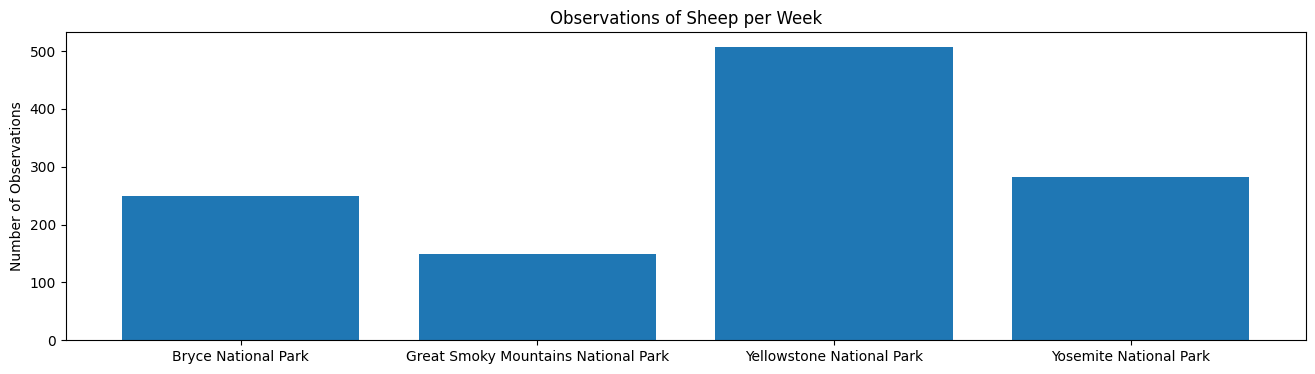

<Figure size 640x480 with 0 Axes>

In [81]:
plt.figure(figsize = (16,4))
ax = plt.subplot()
plt.bar(range(len(obs_by_park)), obs_by_park.observations.values)
ax.set_xticks(range(len(obs_by_park)))
ax.set_xticklabels(obs_by_park.park_name.values)
plt.ylabel('Number of Observations')
plt.title('Observations of Sheep per Week')
plt.show()
plt.clf()

Our scientists know that 15% of sheep at Bryce National Park have foot and mouth disease. Park rangers at Yellowstone National Park have been running a program to reduce the rate of foot and mouth disease at that park. The scientists want to test whether or not this program is working. They want to be able to detect reductions of at least 5 percentage point. For instance, if 10% of sheep in Yellowstone have foot and mouth disease, they'd like to be able to know this, with confidence.

Use the Codecademy sample size calculator to calculate the number of sheep that they would need to observe from each park. Use the default level of significance (90%).

Remember that "Minimum Detectable Effect" is a percent of the baseline.

In [82]:
minimum_detectable_effect = 100 * 0.05 / 0.15
minimum_detectable_effect

33.333333333333336

In [84]:
baseline = 15
sample_size_per_variant = 870

How many weeks would you need to observe sheep at Bryce National Park in order to observe enough sheep? How many weeks would you need to observe at Yellowstone National Park to observe enough sheep?

In [86]:
bryce = 870 / 250.
yellowstone = 870 / 507.

print(bryce, yellowstone)

3.48 1.7159763313609468


##Work in progress
Which species were spotted the most at each park?

In [79]:
parks = observations['park_name'].unique()
print(parks,"\n",len(parks))

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park'] 
 4


In [ ]:
for park in parks:
    most_seen = observations[observations['park_name'] == park]['scientific_name'].idmax()
    common_name = species_info[species_info['scientific_name'] == most_seen]['common_names']
    print("The most spotted species at", park, "is", most_seen,'aka',common_name.iloc[0])

In [21]:
for park in parks:
    animals_seen = observations[observations['park_name'] == park]

    most_seen_animal = animals_seen.groupby('scientific_name')['observations'].sum().idxmax()
    most_seen_count = animals_seen.groupby('scientific_name')['observations'].sum().max()

    print(f"The most seen species at {park} is {most_seen_animal} with {most_seen_count} observations in a single session.")

The most seen species at Great Smoky Mountains National Park is Streptopelia decaocto with 256 observations in a single session.
The most seen species at Yosemite National Park is Hypochaeris radicata with 505 observations in a single session.
The most seen species at Bryce National Park is Columba livia with 339 observations in a single session.
The most seen species at Yellowstone National Park is Holcus lanatus with 805 observations in a single session.


In [22]:
for park in parks:
    animals_seen = observations[observations['park_name'] == park]

    most_seen_species = None
    most_seen_count = 0

    for animal in animals:
        animal_names = species_info[(species_info['category'] == animal) & (species_info['scientific_name'].isin(animals_seen['scientific_name']))]['scientific_name']
        animal_sightings = animals_seen[animals_seen['scientific_name'].isin(animal_names)]
        animal_count = animal_sightings['observations'].sum()

        if animal_count > most_seen_count:
            most_seen_count = animal_count
            most_seen_species = animal_sightings.groupby('scientific_name')['observations'].sum().idxmax()

    print(f"The most seen species (within animals) at {park} is {most_seen_species} with a total of {most_seen_count} observations.")


The most seen species (within animals) at Great Smoky Mountains National Park is Streptopelia decaocto with a total of 37728 observations.
The most seen species (within animals) at Yosemite National Park is Streptopelia decaocto with a total of 76207 observations.
The most seen species (within animals) at Bryce National Park is Columba livia with a total of 51647 observations.
The most seen species (within animals) at Yellowstone National Park is Streptopelia decaocto with a total of 127251 observations.


In [23]:
observations[observations['scientific_name'] == 'Streptopelia decaocto']['observations']

1635     255
3200      92
3376     124
4515      88
7057      74
8072     121
8710     255
10107     72
10643    261
14699    110
14942    183
18854    150
Name: observations, dtype: int64

In [24]:
animals_seen.groupby('scientific_name')['observations'].sum().idxmax()

'Holcus lanatus'